<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session9/FinalS9code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-ev6fqmev
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-ev6fqmev
     |████████████████████████████████| 634kB 2.7MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=d7a98aee34469cb120563bda6b7c1744f31905b0564f971073f2d91cd1499217
  Stored in directory: /tmp/pip-ephem-wheel-cache-552y3rxy/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=44421c65edb192204a4f0a90845df7adadb57a4a411e889051d6b8497a86f071
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [2]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/API'
sys.path.append(folder)


In [0]:
%matplotlib inline
import torch
import train_test_loader
import show_images
import model
import train_test
import evaluate
from Albumentationtransform import AlbumentationTransforms
from GradCam import GradCAM,visualize_cam

In [0]:
import albumentations as A

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
train_transform = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=1) 
                                       ])
# Test Phase transformations
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])


In [6]:
classes, trainloader, testloader = train_test_loader.load(train_transform,test_transform)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


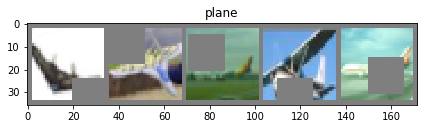

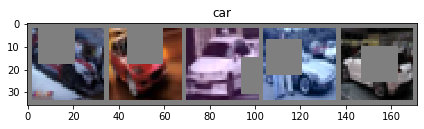

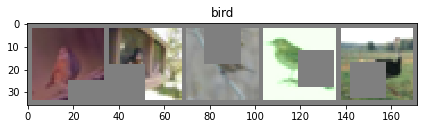

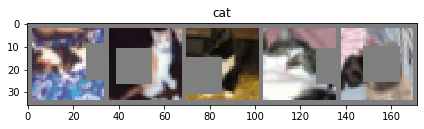

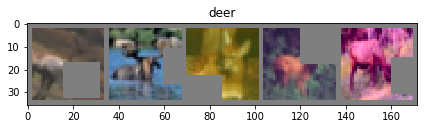

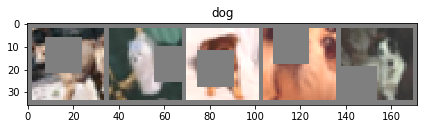

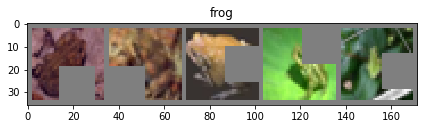

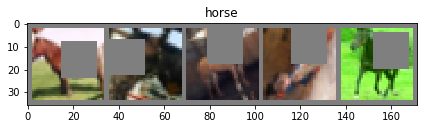

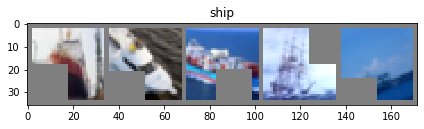

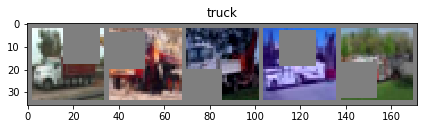

In [7]:
show_images.show_train_data(trainloader, classes)

In [8]:
import model
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.ResNet18(dropout=0.1).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR , MultiStepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = StepLR(optimizer, step_size=12, gamma=0.1)

In [10]:
test_loss = []
test_acc = []
EPOCHS = 40
#best_acc1 = 10
for epoch in range(EPOCHS):
     print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
     train_test.train(model, device, trainloader, optimizer, criterion, epoch)
     scheduler.step()
     test_loss , test_acc = train_test.test(model, device, criterion, testloader)
    #  is_best = test_acc[-1] > best_acc1

    #  best_acc1 = max(test_acc[-1], best_acc1)
    #  save_checkpoint({
    #         'epoch': epoch + 1,
            
    #         'state_dict': model.state_dict(),
    #         'best_acc1': best_acc1,
    #         'optimizer' : optimizer.state_dict(),
    #     }, is_best)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.9047514200210571 Batch_id=390 Accuracy=19.28: 100%|██████████| 391/391 [00:36<00:00, 10.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0146, Accuracy: 3147/10000 (31.47%)

EPOCH: 2 LR: 0.1


Loss=1.9446771144866943 Batch_id=390 Accuracy=32.32: 100%|██████████| 391/391 [00:36<00:00, 10.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0128, Accuracy: 3951/10000 (39.51%)

EPOCH: 3 LR: 0.1


Loss=1.5372369289398193 Batch_id=390 Accuracy=39.14: 100%|██████████| 391/391 [00:36<00:00, 10.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 5009/10000 (50.09%)

EPOCH: 4 LR: 0.1


Loss=1.4163649082183838 Batch_id=390 Accuracy=46.65: 100%|██████████| 391/391 [00:36<00:00, 10.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0098, Accuracy: 5562/10000 (55.62%)

EPOCH: 5 LR: 0.1


Loss=1.113579511642456 Batch_id=390 Accuracy=52.72: 100%|██████████| 391/391 [00:35<00:00, 10.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 5952/10000 (59.52%)

EPOCH: 6 LR: 0.1


Loss=1.2428051233291626 Batch_id=390 Accuracy=56.96: 100%|██████████| 391/391 [00:36<00:00, 10.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 6455/10000 (64.55%)

EPOCH: 7 LR: 0.1


Loss=1.0819063186645508 Batch_id=390 Accuracy=60.40: 100%|██████████| 391/391 [00:36<00:00, 10.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 6380/10000 (63.80%)

EPOCH: 8 LR: 0.1


Loss=1.1703011989593506 Batch_id=390 Accuracy=62.66: 100%|██████████| 391/391 [00:36<00:00, 10.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 6832/10000 (68.32%)

EPOCH: 9 LR: 0.1


Loss=1.0165129899978638 Batch_id=390 Accuracy=64.27: 100%|██████████| 391/391 [00:36<00:00, 10.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6711/10000 (67.11%)

EPOCH: 10 LR: 0.1


Loss=1.021465539932251 Batch_id=390 Accuracy=65.48: 100%|██████████| 391/391 [00:36<00:00, 10.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6831/10000 (68.31%)

EPOCH: 11 LR: 0.1


Loss=0.9285403490066528 Batch_id=390 Accuracy=66.34: 100%|██████████| 391/391 [00:35<00:00, 10.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7341/10000 (73.41%)

EPOCH: 12 LR: 0.1


Loss=0.8131116628646851 Batch_id=390 Accuracy=67.36: 100%|██████████| 391/391 [00:36<00:00, 10.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7241/10000 (72.41%)

EPOCH: 13 LR: 0.010000000000000002


Loss=0.9109921455383301 Batch_id=390 Accuracy=73.27: 100%|██████████| 391/391 [00:36<00:00, 10.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8199/10000 (81.99%)

EPOCH: 14 LR: 0.010000000000000002


Loss=0.8227704763412476 Batch_id=390 Accuracy=75.63: 100%|██████████| 391/391 [00:35<00:00, 10.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8285/10000 (82.85%)

EPOCH: 15 LR: 0.010000000000000002


Loss=0.5149819254875183 Batch_id=390 Accuracy=76.31: 100%|██████████| 391/391 [00:35<00:00, 10.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8355/10000 (83.55%)

EPOCH: 16 LR: 0.010000000000000002


Loss=0.5065191984176636 Batch_id=390 Accuracy=77.10: 100%|██████████| 391/391 [00:35<00:00, 10.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8330/10000 (83.30%)

EPOCH: 17 LR: 0.010000000000000002


Loss=0.5887183547019958 Batch_id=390 Accuracy=77.74: 100%|██████████| 391/391 [00:35<00:00, 10.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8442/10000 (84.42%)

EPOCH: 18 LR: 0.010000000000000002


Loss=0.5625561475753784 Batch_id=390 Accuracy=78.37: 100%|██████████| 391/391 [00:35<00:00, 10.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8436/10000 (84.36%)

EPOCH: 19 LR: 0.010000000000000002


Loss=0.5862877368927002 Batch_id=390 Accuracy=78.55: 100%|██████████| 391/391 [00:35<00:00, 10.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8484/10000 (84.84%)

EPOCH: 20 LR: 0.010000000000000002


Loss=0.4909439980983734 Batch_id=390 Accuracy=78.95: 100%|██████████| 391/391 [00:36<00:00, 10.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8496/10000 (84.96%)

EPOCH: 21 LR: 0.010000000000000002


Loss=0.4741581976413727 Batch_id=390 Accuracy=79.35: 100%|██████████| 391/391 [00:35<00:00, 10.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8429/10000 (84.29%)

EPOCH: 22 LR: 0.010000000000000002


Loss=0.5063308477401733 Batch_id=390 Accuracy=79.73: 100%|██████████| 391/391 [00:35<00:00, 10.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8508/10000 (85.08%)

EPOCH: 23 LR: 0.010000000000000002


Loss=0.5735176801681519 Batch_id=390 Accuracy=80.19: 100%|██████████| 391/391 [00:35<00:00, 10.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8517/10000 (85.17%)

EPOCH: 24 LR: 0.010000000000000002


Loss=0.6851176023483276 Batch_id=390 Accuracy=80.34: 100%|██████████| 391/391 [00:35<00:00, 11.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8568/10000 (85.68%)

EPOCH: 25 LR: 0.0010000000000000002


Loss=0.5048227310180664 Batch_id=390 Accuracy=81.80: 100%|██████████| 391/391 [00:35<00:00, 11.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8712/10000 (87.12%)

EPOCH: 26 LR: 0.0010000000000000002


Loss=0.48925089836120605 Batch_id=390 Accuracy=82.69: 100%|██████████| 391/391 [00:35<00:00, 10.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8709/10000 (87.09%)

EPOCH: 27 LR: 0.0010000000000000002


Loss=0.6221409440040588 Batch_id=390 Accuracy=82.87: 100%|██████████| 391/391 [00:35<00:00, 10.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8715/10000 (87.15%)

EPOCH: 28 LR: 0.0010000000000000002


Loss=0.35729971528053284 Batch_id=390 Accuracy=82.82: 100%|██████████| 391/391 [00:35<00:00, 11.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8764/10000 (87.64%)

EPOCH: 29 LR: 0.0010000000000000002


Loss=0.383084237575531 Batch_id=390 Accuracy=83.27: 100%|██████████| 391/391 [00:35<00:00, 11.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8793/10000 (87.93%)

EPOCH: 30 LR: 0.0010000000000000002


Loss=0.6313756108283997 Batch_id=390 Accuracy=83.25: 100%|██████████| 391/391 [00:35<00:00, 10.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8762/10000 (87.62%)

EPOCH: 31 LR: 0.0010000000000000002


Loss=0.4906395971775055 Batch_id=390 Accuracy=83.25: 100%|██████████| 391/391 [00:35<00:00, 10.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8748/10000 (87.48%)

EPOCH: 32 LR: 0.0010000000000000002


Loss=0.46169978380203247 Batch_id=390 Accuracy=83.33: 100%|██████████| 391/391 [00:35<00:00, 11.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8790/10000 (87.90%)

EPOCH: 33 LR: 0.0010000000000000002


Loss=0.4205418527126312 Batch_id=390 Accuracy=83.64: 100%|██████████| 391/391 [00:35<00:00, 11.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8781/10000 (87.81%)

EPOCH: 34 LR: 0.0010000000000000002


Loss=0.4377669394016266 Batch_id=390 Accuracy=83.70: 100%|██████████| 391/391 [00:35<00:00, 11.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8767/10000 (87.67%)

EPOCH: 35 LR: 0.0010000000000000002


Loss=0.3934921622276306 Batch_id=390 Accuracy=83.91: 100%|██████████| 391/391 [00:35<00:00, 11.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8809/10000 (88.09%)

EPOCH: 36 LR: 0.0010000000000000002


Loss=0.4960654377937317 Batch_id=390 Accuracy=84.07: 100%|██████████| 391/391 [00:35<00:00, 11.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8799/10000 (87.99%)

EPOCH: 37 LR: 0.00010000000000000003


Loss=0.47376203536987305 Batch_id=390 Accuracy=83.99: 100%|██████████| 391/391 [00:35<00:00, 11.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8794/10000 (87.94%)

EPOCH: 38 LR: 0.00010000000000000003


Loss=0.652383029460907 Batch_id=390 Accuracy=84.14: 100%|██████████| 391/391 [00:35<00:00, 11.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8826/10000 (88.26%)

EPOCH: 39 LR: 0.00010000000000000003


Loss=0.3662044107913971 Batch_id=390 Accuracy=84.19: 100%|██████████| 391/391 [00:35<00:00, 11.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8820/10000 (88.20%)

EPOCH: 40 LR: 0.00010000000000000003


Loss=0.3592602610588074 Batch_id=390 Accuracy=84.46: 100%|██████████| 391/391 [00:35<00:00, 11.03it/s]



Test set: Average loss: 0.0028, Accuracy: 8819/10000 (88.19%)



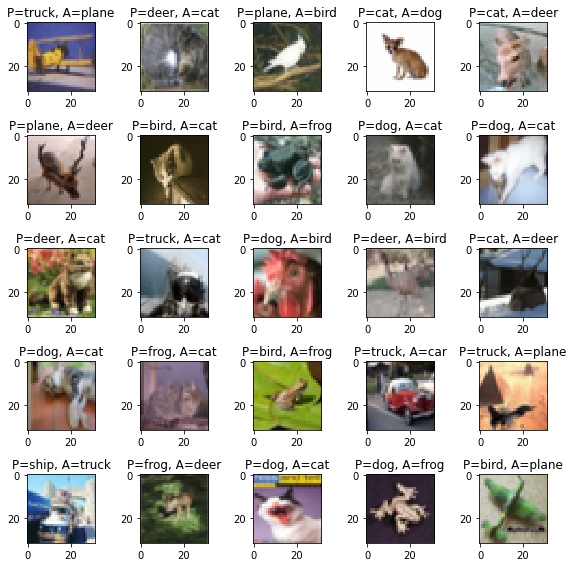

In [11]:
evaluate.show_misclassified_images(model, device, testloader, classes)

In [12]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 88 %


In [0]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 91 %
Accuracy of   car : 96 %
Accuracy of  bird : 84 %
Accuracy of   cat : 74 %
Accuracy of  deer : 88 %
Accuracy of   dog : 81 %
Accuracy of  frog : 90 %
Accuracy of horse : 92 %
Accuracy of  ship : 94 %
Accuracy of truck : 93 %


Text(0.5, 1.0, 'Test Accuracy')

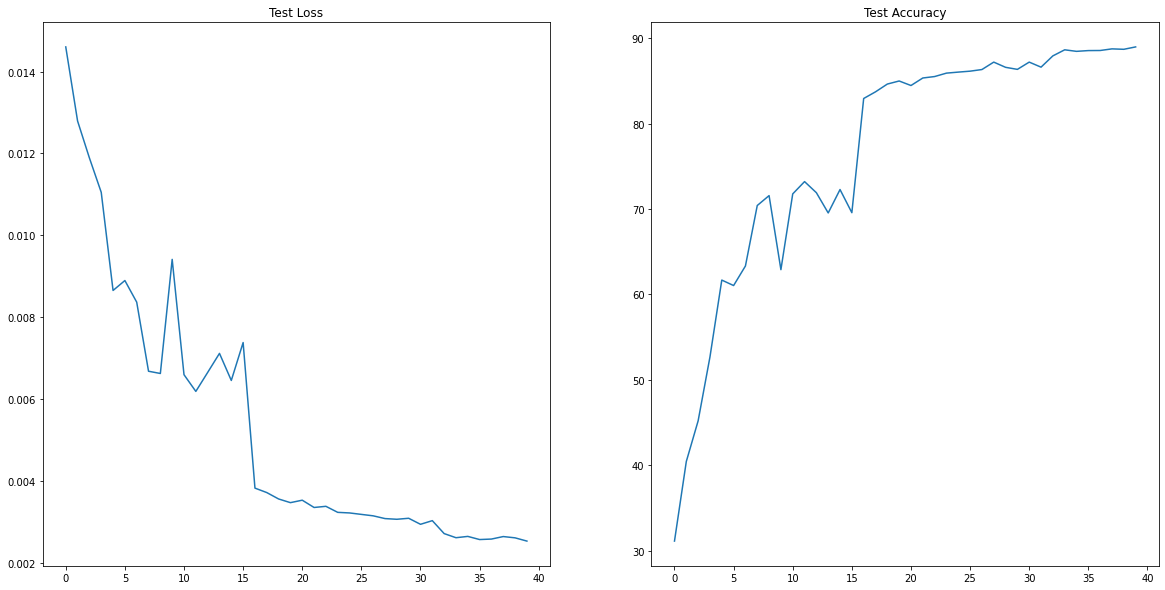

In [0]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].plot(test_loss)
axs[0].set_title("Test Loss")


axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")



In [0]:
import shutil
def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')

In [0]:
import PIL
img_name =[sys.path[-1]+'/images/cat.jpeg',sys.path[-1]+'/images/dog.jpeg',sys.path[-1]+'/images/bird.jpeg',sys.path[-1]+'/images/truck.jpeg',sys.path[-1]+'/images/car.jpeg']

pil_image = []
for i,img in enumerate(img_name):
   pil_image.append(PIL.Image.open(img))

In [0]:
from torchvision import transforms
normed_torch_img = []
torch_img_list = []

for i in pil_image:
  torch_img = transforms.Compose([
      transforms.Resize((32, 32)),
      transforms.ToTensor()
  ])(i).to(device)
  torch_img_list.append(torch_img)
  normed_torch_img .append(transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])(torch_img)[None])

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img,c = "" ):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig = plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)),interpolation='none')
    plt.title(c)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


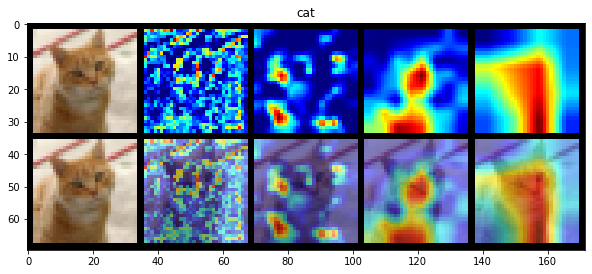

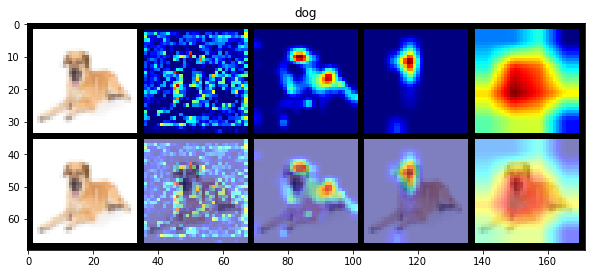

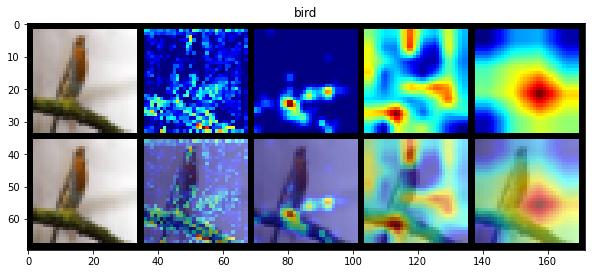

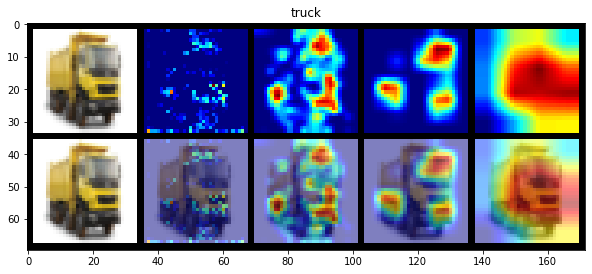

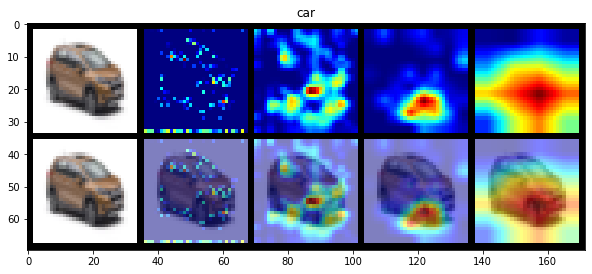

In [0]:
import copy
from torchvision.utils import make_grid, save_image
for i,k in enumerate(normed_torch_img):
  images1 = [torch_img_list[i].cpu()]
  images2 =  [torch_img_list[i].cpu()]
  b = copy.deepcopy(model.to(device))
  output = model(normed_torch_img[i])
  _, predicted = torch.max(output.data, 1)
  #print(classes[int(predicted)])
  layers =  [b.layer1,b.layer2,b.layer3,b.layer4]
  for j in layers:
    g = GradCAM(b,j)
    mask, _= g(normed_torch_img[i])
    heatmap, result = visualize_cam(mask,torch_img_list[i] )
    images1.extend([heatmap])
    images2.extend([result])
  grid_image = make_grid(images1+images2,nrow=5)
  imshow(grid_image,c = classes[int(predicted)])
  